In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

23.49762953365162 -22.170485361187104
-0.5652289725848192 154.58219618017296
55.78533923450934 36.532403328530165
21.349536371564824 -95.11160738584769
12.762120415914907 -6.261708678938703
-9.646640704143167 6.546354569878105
-87.84974600533988 72.32799733586751
-10.952120090009046 -167.1442959086275
70.77049910143714 -45.381302236498925
69.29952616038813 -74.41458784944889
45.622994357739174 -33.22930945939706
32.813807342026266 -100.71614432763079
-66.45124026096701 -65.53140612194528
-50.782626070285204 161.28672051793552
54.600962621867836 5.595264809667327
63.69992396806367 44.997436462764085
29.198559558323296 71.92056843638875
-15.895192072450683 119.98637415909883
-72.98118807457602 105.40554204126283
-21.545872407671737 -29.71045282693467
-35.17803620733551 -11.73313466633482
-8.82645284546497 -38.88763015856017
-45.57249296053146 83.4027569735801
-19.989698517853142 -96.63775782002888
62.2951121617896 179.83595435699374
64.31920344195836 160.05155431469723
29.675280669601108

-28.064888847265152 173.81193969944036
67.53945252218685 -27.54355047582328
-57.018235768844924 -44.20610908623303
-61.61718743718173 -56.739844805921464
16.781469620687858 -151.1355813435018
21.587323237960945 -150.14675313485026
-69.01380880703299 111.73270838985161
-54.61326314873693 173.78082627980604
-13.546888432247826 -139.56884825035334
-2.35118764161804 -164.57597523789414
-40.401290928502256 139.37021934980942
74.96466788821775 -128.8554239102431
43.275080586859104 -31.184183101640457
-1.0120244752885696 -13.181347200966712
-59.26131369018371 36.45751665727008
13.49254292571328 -11.001794674096885
54.48429634161516 49.78059027886886
-65.20929501002726 -17.017818363615618
-8.947294470777862 -20.643394079057742
-9.380990694816958 -31.06929237006625
29.069755548136527 -112.46637444219387
-17.522390435392865 58.118590916817766
-24.81443669079482 -1.7475042643242773
-40.71223973437142 -96.99853454814067
13.682204585662717 -68.42669154777883
20.48409905987596 174.5589018418621
82.3

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [28]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nouadhibou
Processing Record 2 of Set 1 | namatanai
Processing Record 3 of Set 1 | kolyubakino
Processing Record 4 of Set 1 | vega de alatorre
Processing Record 5 of Set 1 | segou
Processing Record 6 of Set 1 | luanda
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | snyder
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tuatapere
Processing Record 15 of Set 1 | leeuwarden
Processing Record 16 of Set 1 | karpogory
Processing Record 17 of Set 1 | yazman
Processing Record 18 of Set 1 | broome
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | caravelas
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Se

Processing Record 37 of Set 4 | odweyne
Processing Record 38 of Set 4 | kapuskasing
Processing Record 39 of Set 4 | moussoro
Processing Record 40 of Set 4 | darhan
Processing Record 41 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | isfara
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | khudumelapye
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | waitati
Processing Record 2 of Set 5 | shekhupura
Processing Record 3 of Set 5 | lucapa
Processing Record 4 of Set 5 | gerash
Processing Record 5 of Set 5 | tingo maria
Processing Record 6 of Set 5 | ladario
Processing Record 7 of Set 5 | cairns
Processing Record 8 of Set 5 | zaplyusye
City not found. Skipping...
Processing Record 9 o

Processing Record 21 of Set 8 | kyra
Processing Record 22 of Set 8 | makaha
Processing Record 23 of Set 8 | the pas
Processing Record 24 of Set 8 | pangai
Processing Record 25 of Set 8 | samarai
Processing Record 26 of Set 8 | victoria point
Processing Record 27 of Set 8 | muncar
Processing Record 28 of Set 8 | qaqortoq
Processing Record 29 of Set 8 | margate
Processing Record 30 of Set 8 | warqla
City not found. Skipping...
Processing Record 31 of Set 8 | ambilobe
Processing Record 32 of Set 8 | comodoro rivadavia
Processing Record 33 of Set 8 | seminole
Processing Record 34 of Set 8 | moron
Processing Record 35 of Set 8 | clovis
Processing Record 36 of Set 8 | yar-sale
Processing Record 37 of Set 8 | sitka
Processing Record 38 of Set 8 | cayenne
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | dingle
Processing Record 41 of Set 8 | murfreesboro
Processing Record 42 of Set 8 | the valley
Processing Record 43 of Set 8 | sampang
Processing Record 

Processing Record 11 of Set 12 | kigoma
Processing Record 12 of Set 12 | xingcheng
Processing Record 13 of Set 12 | flin flon
Processing Record 14 of Set 12 | krasnoselkup
Processing Record 15 of Set 12 | tarauaca
Processing Record 16 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 12 | ternate
Processing Record 18 of Set 12 | clonakilty
Processing Record 19 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 12 | xghajra
City not found. Skipping...
Processing Record 21 of Set 12 | mutsamudu
City not found. Skipping...
Processing Record 22 of Set 12 | saint-martin-boulogne
Processing Record 23 of Set 12 | orzhytsya
Processing Record 24 of Set 12 | yangjiang
Processing Record 25 of Set 12 | gogrial
Processing Record 26 of Set 12 | galveston
Processing Record 27 of Set 12 | ban pong
Processing Record 28 of Set 12 | copiapo
Processing Record 29 of Set 12 | khormuj
City not found. Skipping...
Processing Record 30 of Set 12 | zavetno

In [40]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.9310,-17.0347,71.58,100,100,3.44,MR,2022-06-21 02:05:53
1,Namatanai,-3.6667,152.4333,85.32,66,19,5.23,PG,2022-06-21 02:05:53
2,Kolyubakino,55.6680,36.5323,55.58,86,100,1.25,RU,2022-06-21 02:05:54
3,Vega De Alatorre,20.0333,-96.6333,78.28,83,53,5.84,MX,2022-06-21 02:05:54
4,Segou,13.4317,-6.2157,81.32,64,64,9.22,ML,2022-06-21 02:05:55
5,Luanda,-8.8368,13.2343,66.20,94,0,6.91,AO,2022-06-21 02:04:28
6,Ilulissat,69.2167,-51.1000,33.82,93,100,11.50,GL,2022-06-21 02:05:55
7,Clyde River,70.4692,-68.5914,34.84,78,91,4.59,CA,2022-06-21 02:05:56
8,Lagoa,39.0500,-27.9833,63.46,89,94,20.54,PT,2022-06-21 02:05:56
9,Snyder,32.7179,-100.9176,91.74,19,40,8.05,US,2022-06-21 02:03:52


In [12]:
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2022-06-21 02:05:53,20.9310,-17.0347,71.58,100,100,3.44
1,Namatanai,PG,2022-06-21 02:05:53,-3.6667,152.4333,85.32,66,19,5.23
2,Kolyubakino,RU,2022-06-21 02:05:54,55.6680,36.5323,55.58,86,100,1.25
3,Vega De Alatorre,MX,2022-06-21 02:05:54,20.0333,-96.6333,78.28,83,53,5.84
4,Segou,ML,2022-06-21 02:05:55,13.4317,-6.2157,81.32,64,64,9.22


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


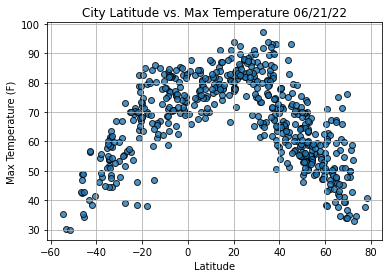

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

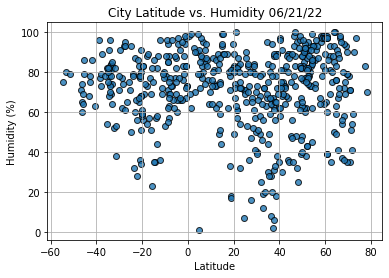

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

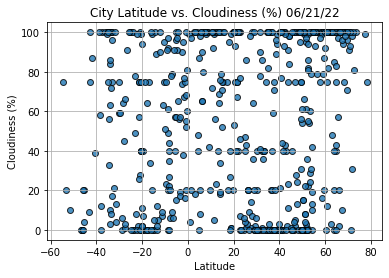

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

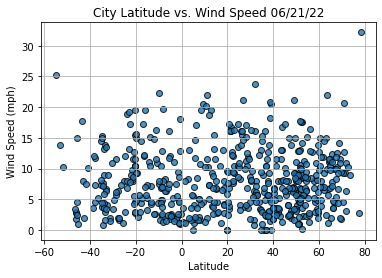

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

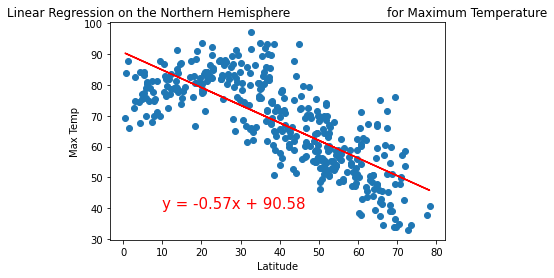

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

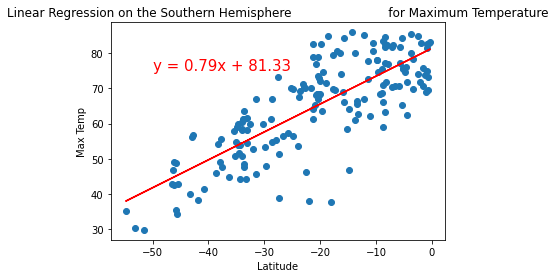

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,75))

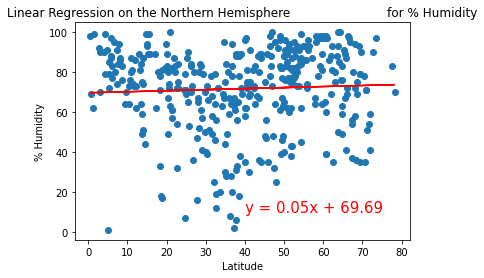

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

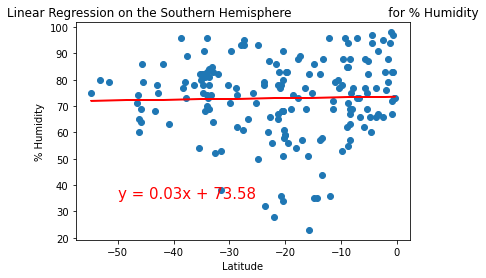

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,35))

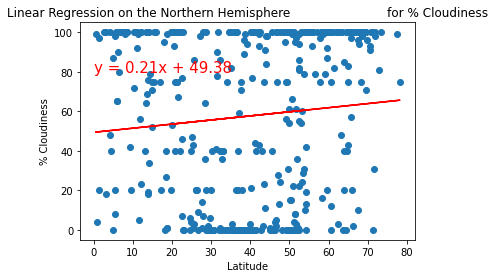

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,80))

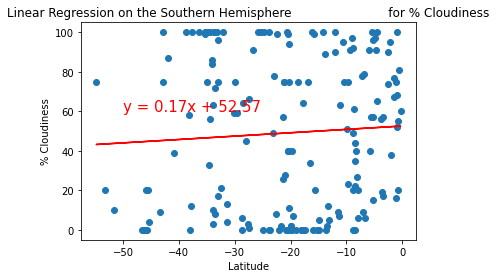

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

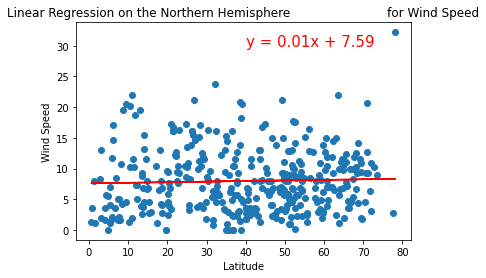

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

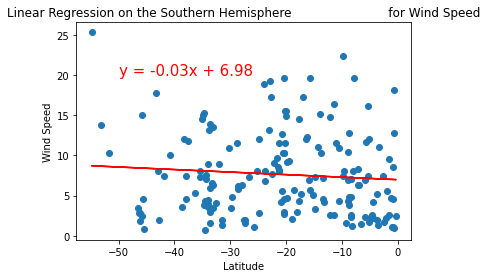

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))